In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top',
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat', 
               'Sandal',
               'Shirt', 
               'Sneaker',
               'Bag', 
               'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

## Process the data

The original data's pixel values range from `0` to `255`, indicating the data is with color. Let's see the first image in the train set

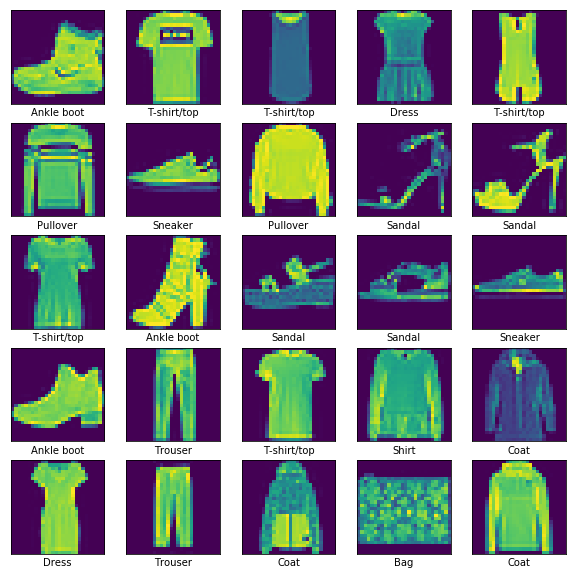

In [9]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])

Therefore we scale those values to range of `0` to `1` before feeding into the nerual network model. For this cast the datatype of the image compoenents from an integer to float, and divide bu 255.

In [10]:
train_images = train_images / 255
test_images = test_images / 255

Let's see the first `25` images from training set and display the class for each image

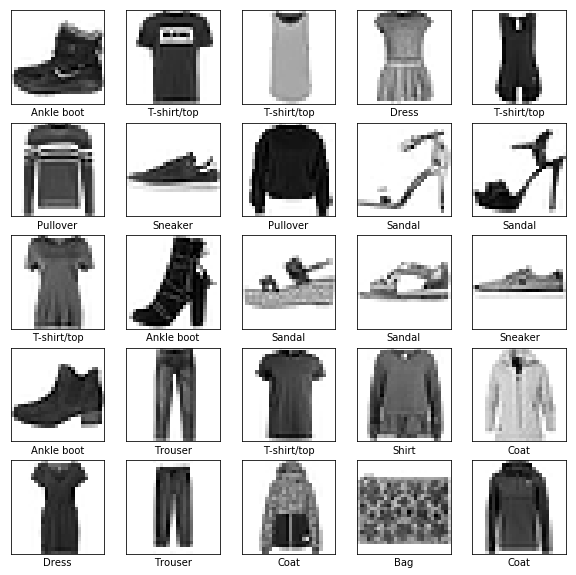

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Build the model

## Setup layers

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Colocations handled automatically by placer.


## Compile the model

In [13]:
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Fitting the model with training data

In [14]:
tensorboard = keras.callbacks.TensorBoard(log_dir='/tmp/mnist-simple-dense')

In [15]:
model.fit(
    train_images,
    train_labels,
    epochs=5,
    callbacks=[tensorboard]
)

Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4984 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3771 - acc: 0.8650
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3395 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3151 - acc: 0.8845
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2962 - acc: 0.8907


## Evaluate accuracy

In [16]:
test_loss, test_acc = model.evaluate(
    test_images,
    test_labels
)

 7712/10000 [======================>.......] - ETA: 0s - loss: 0.3502 - acc: 0.8751

In [17]:
print('Test Accuracy: ', test_acc)

Test Accuracy:  0.8767


## Make prediction

In [18]:
predictions = model.predict(test_images)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

## Let's do some graphing

In [21]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array, true_label,img = predictions_array[i],true_label[i],img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cap=plt.cm.binary)

In [22]:
# end https://www.tensorflow.org/tutorials/keras/basic_classification